In [1]:
import pandas as pd

# read in all csvs
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
sprint_results = pd.read_csv("sprint_results.csv")
status = pd.read_csv("status.csv")
lap_times = pd.read_csv("lap_times.csv")
circuits = pd.read_csv("circuits.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructors = pd.read_csv("constructors.csv")
driver_standings = pd.read_csv("driver_standings.csv")
drivers = pd.read_csv("drivers.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")
qualifying = pd.read_csv("qualifying.csv")

In [2]:
driver_standings
driver_standings.rename(columns={'points': 'd_points'}, inplace=True)
driver_standings.rename(columns={'position': 'd_position'}, inplace=True)
driver_standings.rename(columns={'positionText': 'd_positionText'}, inplace=True)
driver_standings.rename(columns={'wins': 'd_wins'}, inplace=True)


In [3]:
constructor_standings
constructor_standings.rename(columns={'points': 'c_points'}, inplace=True)
constructor_standings.rename(columns={'position': 'c_position'}, inplace=True)
constructor_standings.rename(columns={'positionText': 'c_positionText'}, inplace=True)
constructor_standings.rename(columns={'wins': 'c_wins'}, inplace=True)


In [4]:
# races

race_df = pd.merge(races, results, on="raceId")
race_df.head(5)
race_df.rename(columns={'time_y': 'driverRaceTime'}, inplace=True)
race_df.rename(columns={'time_x': 'time'}, inplace=True)

race_df.head(5)

race_df = pd.merge(race_df, driver_standings, on=["raceId", "driverId"])
race_df = pd.merge(race_df, constructor_standings, on=["raceId", "constructorId"])
race_df = pd.merge(race_df, status, on=["statusId"])
race_df = pd.merge(race_df, drivers, on=["driverId"])





In [5]:
# qualifying

qual_df = pd.merge(qualifying, results, on="raceId")
qual_df.head(5)
qual_df.rename(columns={'time_y': 'driverRaceTime'}, inplace=True)
qual_df.rename(columns={'time_x': 'time'}, inplace=True)

qual_df.head(5)

qual_df.info()
qual_df = pd.merge(race_df, status, on=["statusId"])
qual_df = pd.merge(drivers, status, on=["driverId"])


#lap_times # can get average lap time for driver and race

# pit_stops # get average stop time for driver and race



<class 'pandas.core.frame.DataFrame'>
Int64Index: 207478 entries, 0 to 207477
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   qualifyId        207478 non-null  int64  
 1   raceId           207478 non-null  int64  
 2   driverId_x       207478 non-null  int64  
 3   constructorId_x  207478 non-null  int64  
 4   number_x         207478 non-null  int64  
 5   position_x       207478 non-null  int64  
 6   q1               207318 non-null  object 
 7   q2               204458 non-null  object 
 8   q3               201498 non-null  object 
 9   resultId         207478 non-null  int64  
 10  driverId_y       207478 non-null  int64  
 11  constructorId_y  207478 non-null  int64  
 12  number_y         207478 non-null  object 
 13  grid             207478 non-null  int64  
 14  position_y       207478 non-null  object 
 15  positionText     207478 non-null  object 
 16  positionOrder    207478 non-null  int6

KeyError: 'driverId'

In [ ]:
race_df

In [ ]:
driver_standings

In [ ]:
race_df

In [6]:
# get average pit stop time for driver and race
pit_stops['average_pit_stop_duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce')

average_pit_stop_duration = pit_stops.groupby(['raceId', 'driverId'])['average_pit_stop_duration'].mean().reset_index()
average_pit_stop_duration


#merging to qual and race dfs

race_df = pd.merge(race_df, average_pit_stop_duration, on=["raceId", "driverId"])

qual_df = pd.merge(race_df, average_pit_stop_duration, on=["raceId", "driverId"])
qual_df = pd.merge(race_df, drivers, on=["driverId", "driverId"])

average_pit_stop_duration.head(5)

,raceId,driverId,average_pit_stop_duration
0,841,1,23.213
1,841,2,24.046
2,841,3,23.716
3,841,4,24.055
4,841,5,24.865


In [7]:
#lap_times # can get average lap time for driver and race

def time_to_seconds(time_str):
    minutes, seconds = time_str.split(':')
    seconds, tenths = seconds.split('.')
    total_seconds = int(minutes) * 60 + int(seconds) + int(tenths) * 0.1
    return total_seconds

# Apply the function to the 'time' column
lap_times['average_lap_seconds'] = lap_times['time'].apply(time_to_seconds)

#average lap time (in seconds) per race per driver
average_lap_duration = lap_times.groupby(['raceId', 'driverId'])['average_lap_seconds'].mean().reset_index()



#merging to qual and race dfs
race_df = pd.merge(race_df, average_lap_duration, on=["raceId", "driverId"])

qual_df = pd.merge(race_df, average_lap_duration, on=["raceId", "driverId"])


In [ ]:
average_lap_duration.head(5)


In [ ]:
qual_df.head(5)

In [ ]:
race_df.info()

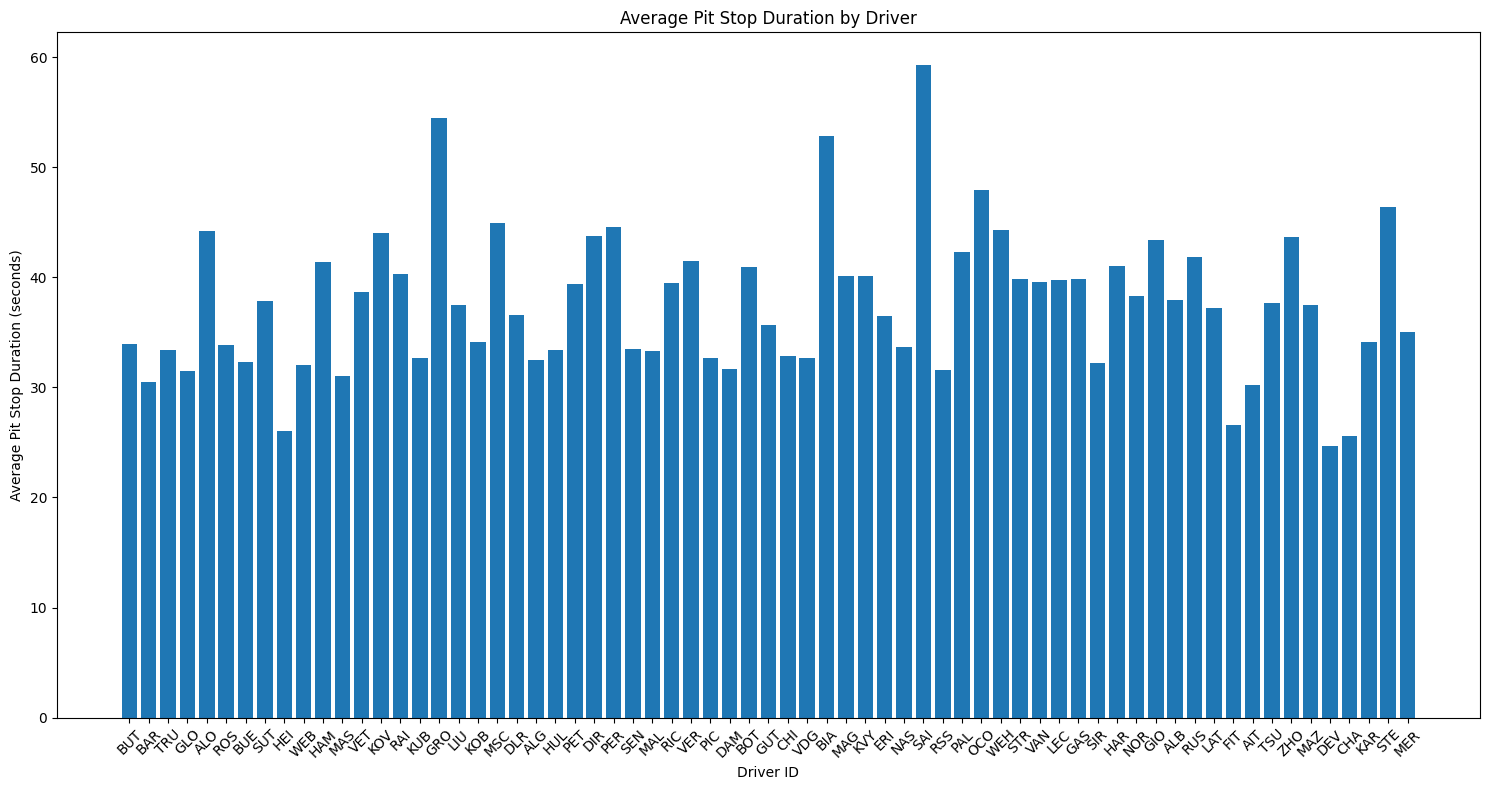

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.bar(race_df['code'].astype(str), race_df['average_pit_stop_duration'])
plt.xlabel('Driver ID')
plt.ylabel('Average Pit Stop Duration (seconds)')
plt.title('Average Pit Stop Duration by Driver')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
race_df.info()